# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Osarieme Ehimwenma
I am very sorry for the late submission, i have been having light issues
<br>

## Please show and display ALL your calculations and results.


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
#%load_ext lab_black
#%auto reload imports
%load_ext autoreload
%autoreload 2

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

In [2]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is just defined to load data
    
    Paramaters;
        filename (str): the filepath
        sep (str, default = ","): separators could also be ',', '\t', e.t.c
        
    Returns:
        data (pd.DataFrame): this is the loaded dataframe
    """
    
    data =pd.read_csv(filename)
    print(f"shape of data: {data.shape}\n")
    return data

In [3]:
#Load data
data = pd.read_csv("Ulta Skincare Reviews.csv")
print(f"shape of data: {data.shape}\n")

df = data.copy()

df.head(3)

shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [5]:
# data types
df.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

In [6]:
# checking for null values
df.isna().sum()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [8]:
df.columns

Index(['Review_Title', 'Review_Text', 'Verified_Buyer', 'Review_Date',
       'Review_Location', 'Review_Upvotes', 'Review_Downvotes', 'Product',
       'Brand', 'Scrape_Date'],
      dtype='object')

In [9]:
num_col = [(df.select_dtypes(include = np.number).columns)]
cat_col = [(df.select_dtypes(include = object).columns)]

In [10]:
cat_col = df.select_dtypes(include= object)
cat_col.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [11]:
num_col = df.select_dtypes(include= np.number)
num_col.head()

,Review_Upvotes,Review_Downvotes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [12]:
df.describe()

,Review_Upvotes,Review_Downvotes
count,4146.000000,4146.000000
mean,0.591413,0.161119
std,2.210942,0.912898
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [14]:
df["Verified_Buyer"] = np.where(df["Verified_Buyer"] == "Yes",1,0)
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,0,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,0,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,0,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [15]:
# Importing spacy
import spacy

In [16]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])
doc = nlp(sentences[0])
print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)

Apple is looking at buying U.K. startup for $1 billion


In [17]:
def bag_of_words(*, text=list[str]) -> dict:
    """This is used to return the count of words in a list.

    Params:
        text (list[str]): List of text.

    Returns:
        count_dict (dict): A dict containing the counts of the unique words.
    """
    from collections import Counter

    count_dict = Counter(text)
    return count_dict

In [18]:
# Loading the english language small model of spacy
stopwords = nlp.Defaults.stop_words

print(len(stopwords))
print(stopwords)

326
{'every', '’ll', 'latterly', 'name', 're', 'once', 'same', 'go', 'has', 'themselves', 'me', 'therefore', 'on', 'otherwise', 'thence', 'see', 'hundred', 'whence', 'these', 'twenty', '‘ll', 'between', 'what', '‘d', 'among', 'anyhow', 'above', 'have', 'seems', 'for', 'itself', 'sixty', 'just', 'hereby', 'while', 'herein', 'myself', 'less', 'would', 'then', 'hereupon', 'afterwards', 'whenever', 'seemed', 'or', 'as', 'quite', 'amongst', 'by', 'does', 'however', 'call', 'did', 'everything', 'much', 'nowhere', 'your', 'should', 'eleven', 'when', 'three', 'upon', 'side', 'throughout', 'else', 'except', 'everywhere', 'so', 'towards', 'whither', 'our', 'mostly', 'each', 'there', 'noone', "'ll", 'his', 'at', 'serious', 'anywhere', 'become', '‘ve', 'somewhere', 'i', '‘re', 'here', 'into', 'yet', 'used', 'after', 'yours', 'across', 'nobody', 'get', 'the', '’re', 'up', 'anyone', 'keep', 'eight', 'also', 'very', 'behind', 'everyone', 'even', 'besides', 'elsewhere', 'sometime', 'therein', "'ve", '

In [19]:
text = df["Review_Text"]
text.head()

0                                                                                                                                                       Love using this on my face while in the shower. Heats up and gives a light scrub nicely
1                                                                                                                                                            Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother
2                                                                                                                                                                 Enjoy this product so much ! I look forward to using it - really feels great.
3    I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.
4                                       

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Init
cv = CountVectorizer(stop_words=list(stopwords))

# Fit
cv.fit_transform(text).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap

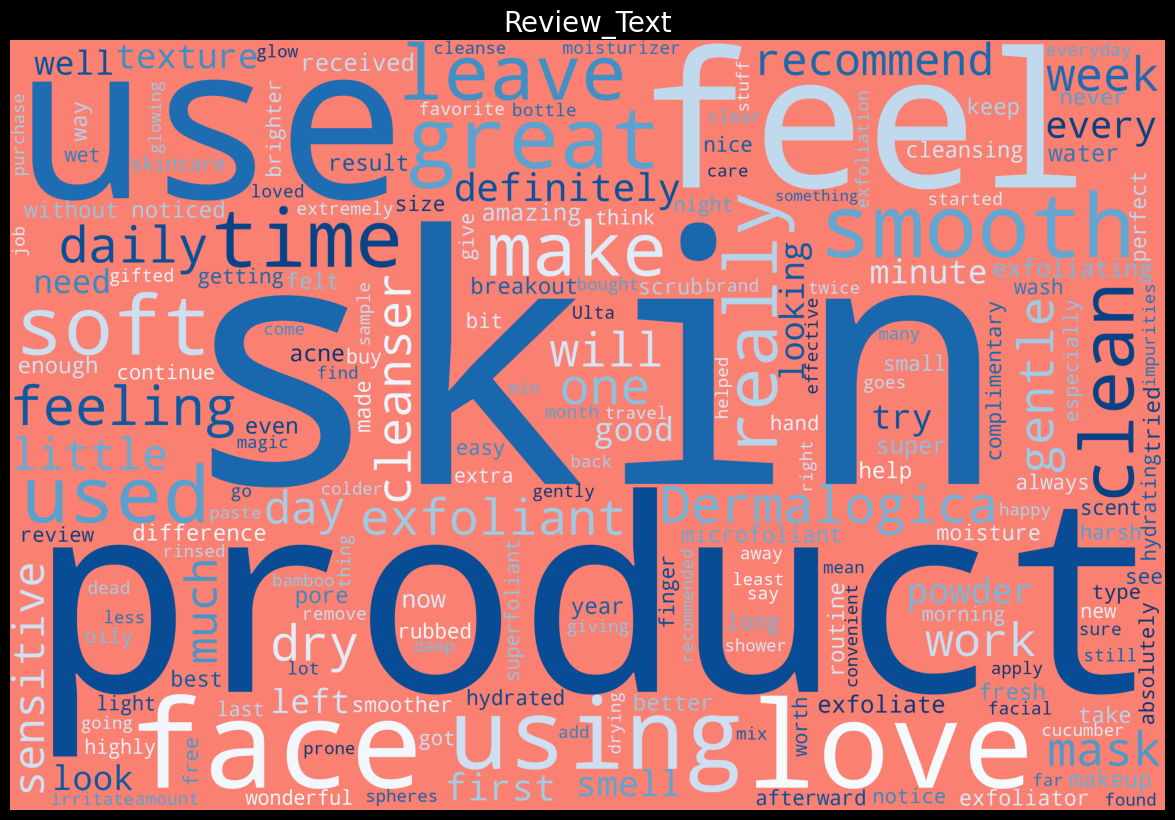

In [23]:
# creating text variable
Review_Text = " ".join(cat for cat in df.Review_Text)

plt.figure(figsize=(20,10),facecolor='k')

# generate word cloud
word_cloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 1,
    background_color = "salmon",
    colormap = "Blues",
    collocations = False,
    stopwords = STOPWORDS,
    
).generate(Review_Text)

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Review_Text',color='white', fontsize=20)
plt.show()

## What can the reviews tell us about the products?

### Insights:
It can be deduced that the products had lots of positive reviews as shown from the words like Smooth, Great, Nice-care, love, Good, Amazing. e.t.c
There were no negative words.

## Do most buyers have common skincare issues?

### Insights:

It can be deduced that most buyers have a similar skincare issue such as Acne and drying of skin making the skin sensitive since they have to exfoliate, use mask, cleanser, moisturizer and scrub.

## What issues did the products help solve or exacerbate?

### Insights:

It was mainly to exfoliate due to type of skincare issue.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [25]:
Thermafoliant=df[df['Product']=='Multi-Vitamin Thermafoliant']

Exfoliant=df[df['Product']=='Hydro Masque Exfoliant']

Superfoliant=df[df['Product']=='Daily Superfoliant']

Microfoliant=df[df['Product']=='Daily Microfoliant']

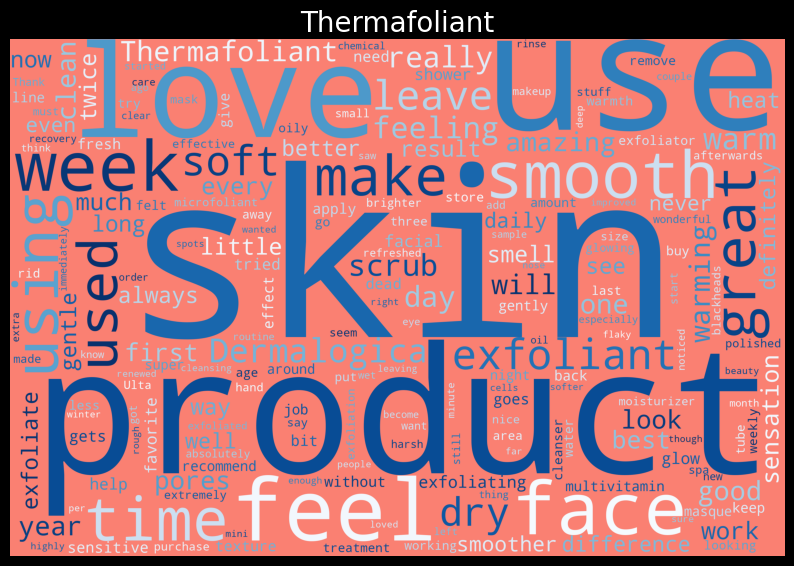

In [26]:
plt.figure(figsize=(10,10),facecolor='k')
wordcloud = WordCloud(
    random_state= 1,
    width= 3000,
    height= 2000,
    background_color = "salmon",
    colormap = "Blues",
    collocations = False,
    stopwords = STOPWORDS,

                      
).generate(str(Thermafoliant['Review_Text']))


plt.imshow(wordcloud)
plt.axis("off")
plt.title('Thermafoliant',color='white', fontsize=20)
plt.show()

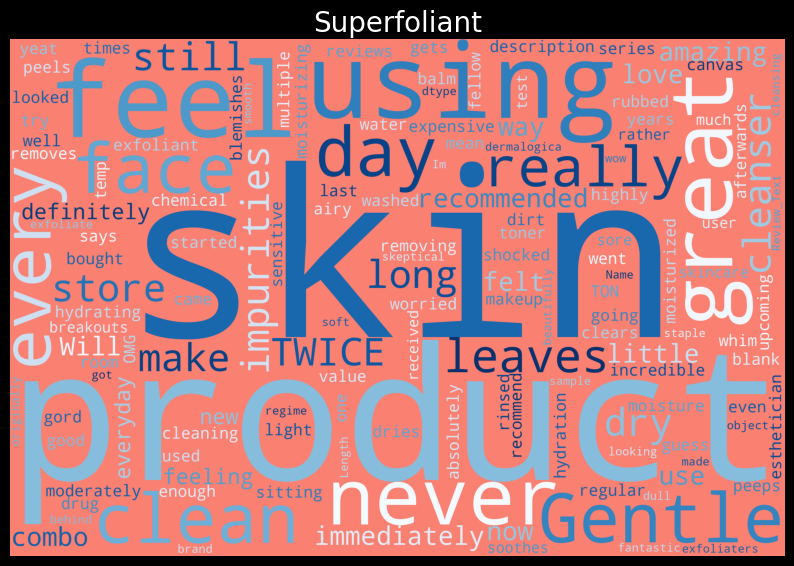

In [27]:
plt.figure(figsize=(10,10),facecolor='k')
wordcloud = WordCloud(
    random_state= 1,
    width= 3000,
    height= 2000,
    background_color = "salmon",
    colormap = "Blues",
    collocations = False,
    stopwords = STOPWORDS,

                      
).generate(str(Superfoliant['Review_Text']))


plt.imshow(wordcloud)
plt.axis("off")
plt.title('Superfoliant',color='white', fontsize=20)
plt.show()

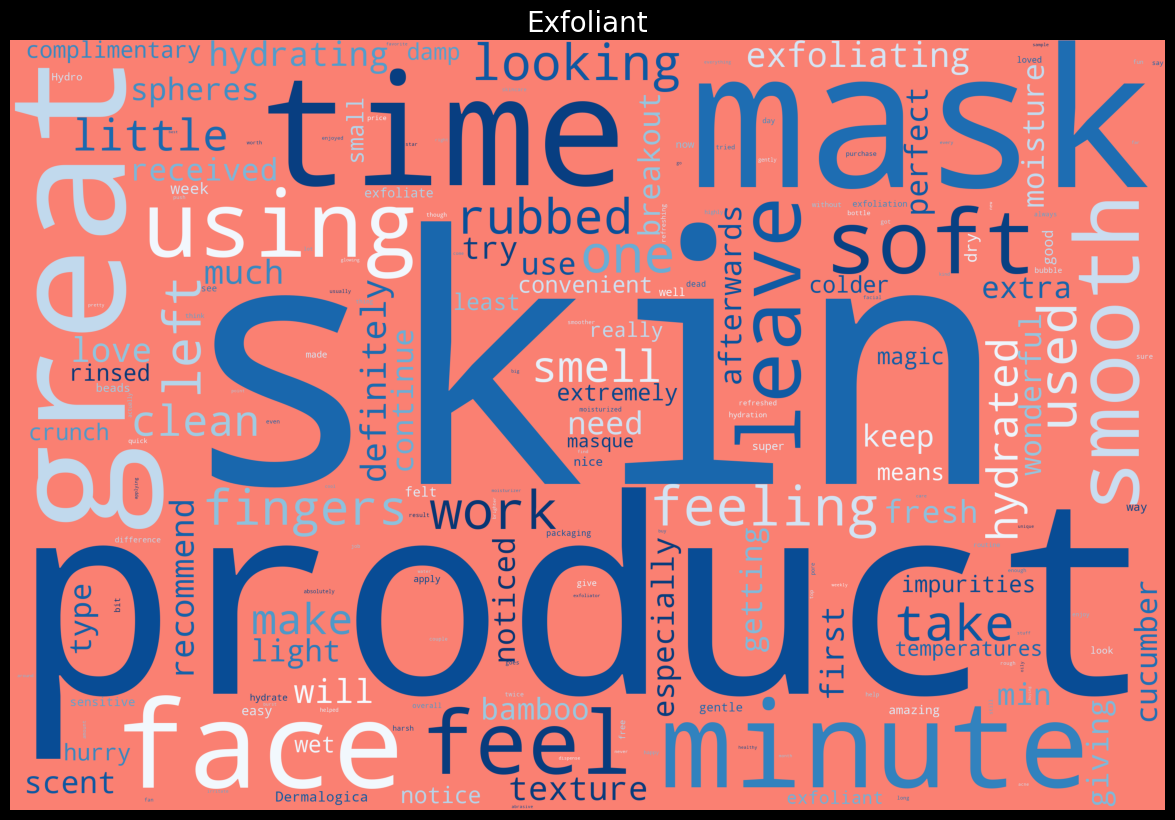

In [28]:
plt.figure(figsize=(20,10),facecolor='k')
wordcloud = WordCloud(
    random_state= 1,
    width= 3000,
    height= 2000,
    background_color = "salmon",
    colormap = "Blues",
    collocations = False,
    stopwords = STOPWORDS,

                      
).generate(str(Exfoliant['Review_Text']))


plt.imshow(wordcloud)
plt.axis("off")
plt.title('Exfoliant',color='white', fontsize=20)
plt.show()

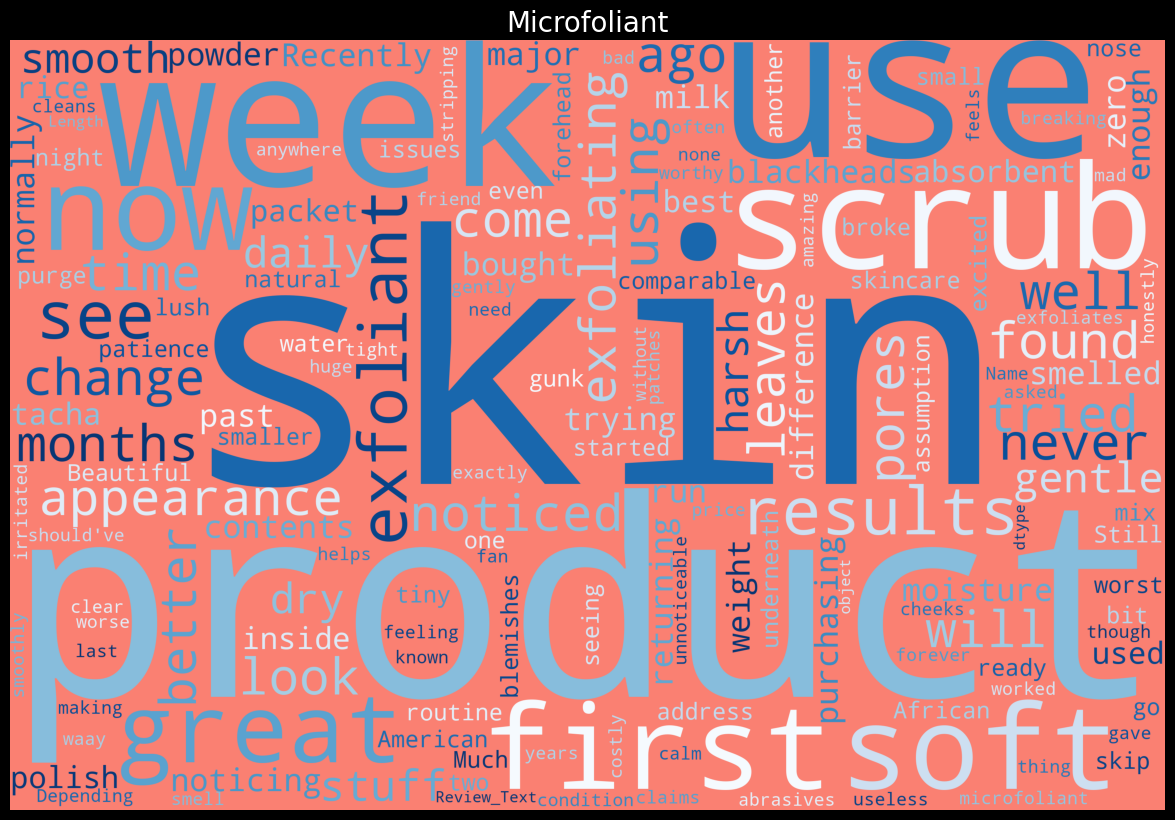

In [29]:
plt.figure(figsize=(20,10),facecolor='k')
wordcloud = WordCloud(
    random_state= 1,
    width= 3000,
    height= 2000,
    background_color = "salmon",
    colormap = "Blues",
    collocations = False,
    stopwords = STOPWORDS,

                      
).generate(str(Microfoliant['Review_Text']))


plt.imshow(wordcloud)
plt.axis("off")
plt.title('Microfoliant',color='white', fontsize=20)
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.